# Importing libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AgglomerativeClustering
from transformers import AutoTokenizer, AutoModel
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import torch
import nltk
from lazypredict.Supervised import LazyClassifier
from nltk.corpus import stopwords
import spacy
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
import string
from wordcloud import WordCloud
from nltk import bigrams
from nltk.collocations import BigramAssocMeasures
from nltk.probability import FreqDist
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
# visualization
import pyLDAvis
import pyLDAvis.gensim_models
from pprint import pprint
import pyLDAvis.gensim_models as gensimvis
import networkx as nx
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn.naive_bayes import ComplementNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import loguniform
import seaborn as sns
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score
from tqdm import tqdm



# Read Dataset

In [4]:
df = pd.read_excel('Labeld data.xlsx')
df

,AP,Ariadne_internal_ID,content,cnt,VVL Mobile,VVL DSL,PO GA,I@H GA,TV GA,OOC (out of category),Comment,Conditional Formatting
0,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77b26-64e3046f-1555...,Herzlich willkommen beim O Kundenservice mein ...,54,False,False,False,False,False,False,NaN,0
1,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d03-64e3074a-24e4...,Guten Morgen bei O sie sprechen mit Alexandra ...,61,False,False,True,False,False,False,NaN,1
2,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d06-64e3074a-6d7f...,Ackermann fertig willkommen bei O sie sprechen...,62,False,False,False,False,False,False,NaN,0
3,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d0f-64e30753-8296...,Herzlich willkommen im O Service mein Name ist...,63,False,False,False,False,False,False,NaN,0
4,Katrin Kühne,FA163E153AE3-1b27-eeeaa700-77d1e-64e30771-785f...,Guten Morgen herzlich willkommen bei O sie spr...,64,False,False,True,False,False,False,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1116,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7a9ba-64e4bc6b-797e...,Schönen guten Tag herzlich willkommen bei O hi...,3440,False,False,False,False,False,False,NaN,0
1117,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7aa4a-64e4c0fe-55cb...,Herzlich willkommen bei blau sie sprechen mit ...,3441,False,False,False,False,False,False,NaN,0
1118,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7aa5c-64e4c193-dba3...,Schönen guten Tag und herzlich willkommen bei ...,3442,False,False,False,False,False,False,NaN,0
1119,Anja Haye-Heinemann,FA163E153AE3-1b27-f06ad700-7aa62-64e4c1ab-7103...,Herzlich willkommen bei Rermodus Service Mutz ...,3443,False,False,False,False,False,False,NaN,0


In [5]:
df.columns


Index(['AP', 'Ariadne_internal_ID', 'content', 'cnt', 'VVL Mobile', 'VVL DSL',
       'PO GA', 'I@H GA', 'TV GA', 'OOC (out of category)', 'Comment',
       'Conditional Formatting'],
      dtype='object')

In [6]:
# Check for missing data in the entire DataFrame
missing_data = df.isnull().sum()

# Print missing data counts for each column
print("Missing Data Counts:")
print(missing_data)

Missing Data Counts:
AP                           0
Ariadne_internal_ID          0
content                      0
cnt                          0
VVL Mobile                   0
VVL DSL                      0
PO GA                        0
I@H GA                       0
TV GA                        0
OOC (out of category)        0
Comment                   1121
Conditional Formatting       0
dtype: int64


In [7]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print duplicate rows
print("Duplicate Rows:")
print(duplicate_rows)

Duplicate Rows:
Empty DataFrame
Columns: [AP, Ariadne_internal_ID, content, cnt, VVL Mobile, VVL DSL, PO GA, I@H GA, TV GA, OOC (out of category), Comment, Conditional Formatting]
Index: []


In [8]:
nlp = spacy.load('de_core_news_sm')
df['text'] = df['content'].apply(lambda x: ' '.join([token.text for token in nlp(x) if token.pos_!='PROPN']))

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-p

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-p

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\catalogue\__init__.py:123: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
C:\Users\Muhammad Farhan\anaconda\Lib\site-p

In [31]:
# Download the NLTK stop words list and wordnet for lemmatization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize the Snowball stemmer and WordNet lemmatizer
stemmer = SnowballStemmer("german")  # Use the appropriate language for stemming
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation and convert to lowercase
    tokens = [word.replace(".", "") for word in tokens]
    tokens = [word.replace("\n", "") for word in tokens]
    tokens = [word.replace(",", "") for word in tokens]
    tokens = [word.replace(",", "") for word in tokens]
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('german'))  # Use the appropriate language
    tokens = [word for word in tokens if word not in stop_words]
    
    # Remove short words (length < 3 characters)
    tokens = [word for word in tokens if len(word) > 2]
    
    # Lemmatize or stem the words
    # Uncomment one of the following lines based on your choice
    # tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    
    # Join the cleaned tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Apply the preprocessing function to the DataFrame
df['text'] = df['text'].apply(preprocess_text)

# Print the cleaned DataFrame
print(df['text'])


[nltk_data] Downloading package stopwords to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Muhammad
[nltk_data]     Farhan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0       herzlich willkomm beim kundenservic nam gruss ...
1       gut morg sprech rout helf geht angegeb rufnumm...
2       fertig willkomm sprech tun handy abgeschloss v...
3       herzlich willkomm servic nam darf tun herr bit...
4       gut morg herzlich willkomm sprech valeri versc...
                              ...                        
1116    schon gut tag herzlich willkomm vertragsverlan...
1117    herzlich willkomm blau sprech herrn leid tun m...
1118    schon gut tag herzlich willkomm nam bestellhot...
1119    herzlich willkomm rermodus oll nam helf bitt m...
1120    schon gut tag herzlich willkomm beim bestell s...
Name: text, Length: 1121, dtype: object


In [32]:
# get number of unique words:
word_set = set()
for row in df["text"]:
    word_set.update(row.split(" "))

len(word_set)

7821

In [33]:
# select the 100 most frequent words
most_frequent = Counter(" ".join(df["text"]).split()).most_common(100)
print([el[0] for el in most_frequent])

['mal', 'genau', 'schon', 'bitt', 'gut', 'vertrag', 'kurz', 'bekomm', 'dank', 'ganz', 'tag', 'moment', 'fall', 'sag', 'gern', 'monat', 'numm', 'schau', 'neu', 'tarif', 'rufnumm', 'frag', 'richtig', 'tun', 'seh', 'war', 'nam', 'leid', 'geht', 'gesagt', 'gleich', 'gerad', 'natur', 'muss', 'person', 'rout', 'einfach', 'mehr', 'per', 'willkomm', 'frau', 'vielleicht', 'geb', 'kundenkennzahl', 'handy', 'probl', 'brauch', 'nein', 'herr', 'klein', 'herzlich', 'mocht', 'klar', 'erst', 'halt', 'imm', 'syst', 'kart', 'schick', 'rabatt', 'angebot', 'gibt', 'viel', 'wunsch', 'steht', 'moglich', 'kolleg', 'bleib', 'seit', 'nee', 'adress', 'darf', 'gar', 'anruf', 'rechnung', 'weit', 'wurd', 'sup', 'weiss', 'guck', 'dat', 'internet', 'wart', 'bewert', 'beispiel', 'versteh', 'bissch', 'wiss', 'zahl', 'heut', 'gesprach', 'krieg', 'nach', 'desweg', 'sprech', 'eigent', 'tschuss', 'end', 'bestat', 'kommt']


In [34]:
# Words to remove
words_to_remove =  most_frequent + ["herr", "hallo", "willkomm", "herzlich", "mal", "tun", "tag", "nam", "guck", "sau", "bitt", 
                                   "halt", "gerad", "weil", "desweg", "gruss", "schon", "abend", "irgendwie", "schau", "nachmittag", "aha",
                                   "gott", "frau", "opus", "herrn", "irgendwo"]

# Function to remove specified words from text
def remove_specific_words(text, words_to_remove):
    # Tokenize the text
    tokens = text.split(" ")
    
    # Filter out words to remove
    filtered_tokens = [word for word in tokens if word not in words_to_remove]
    
    # Join the remaining tokens back into a single string
    cleaned_text = ' '.join(filtered_tokens)
    
    return cleaned_text

# Apply the function to the 'cleaned_text' column
df['text'] = df['text'].apply(lambda x: remove_specific_words(x, words_to_remove))

# Print the cleaned DataFrame
print(df['text'])

0       beim kundenservic perfekt moment seh funfzig l...
1       gut morg sprech rout helf geht angegeb rufnumm...
2       fertig sprech handy abgeschloss vertrag buchst...
3       servic darf imm blind heut planung irgendwann ...
4       gut morg sprech valeri verschenk internet pruf...
                              ...                        
1116    gut vertragsverlanger gut wart kurz muss rufnu...
1117    blau sprech leid morg mehr tut handy funktioni...
1118    gut bestellhotlin fall klar konnt fall eigent ...
1119    rermodus oll helf august bestellt seh raus heu...
1120    gut beim bestell servic hof darf gut tarif ver...
Name: text, Length: 1121, dtype: object


In [35]:
# Split the 'content' column into words and calculate word counts
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Calculate the average word count
average_word_count = df['word_count'].mean()

# Print the average word count
print("Average Word Count:", average_word_count)

# Calculate the average word count
average_word_count_median = df['word_count'].median()

# Print the average word count
print("Median Word Count:", average_word_count_median)


# Print the max word count
print("Max Word Count:", df['word_count'].max())

# Print the min word count
print("Min Word Count:", df['word_count'].min())

Average Word Count: 178.3978590544157
Median Word Count: 128.0
Max Word Count: 1293
Min Word Count: 9


In [36]:
# Find the text with the minimum number of words
min_word_count = df['word_count'].min()
min_word_text = df[df['word_count'] == min_word_count]['text'].values[0]

# Print the text with the minimum word count
print("Text with the Minimum Number of Words:")
print(min_word_text)

# Optionally, you can also print the word count for reference
print(f"Word Count: {min_word_count}")

Text with the Minimum Number of Words:
gut uto mari helf komm leist gut aktuell anschluss
Word Count: 9


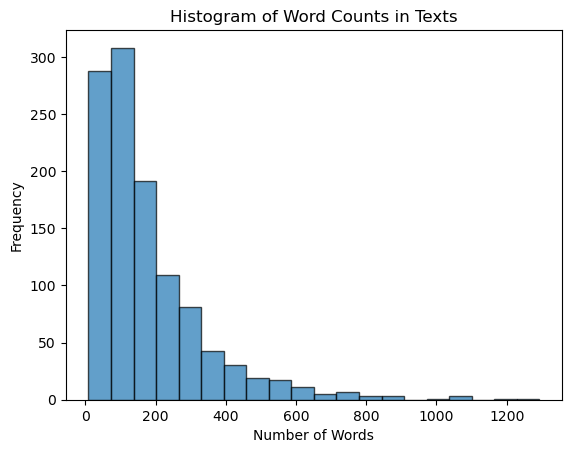

In [48]:
# Create a histogram of the word counts
plt.hist(df['word_count'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Histogram of Word Counts in Texts')
plt.show()


#  Frequency counts for categorical columns

In [37]:

counts_1 = df['VVL Mobile'].value_counts()
counts_1

VVL Mobile
False    1077
True       44
Name: count, dtype: int64

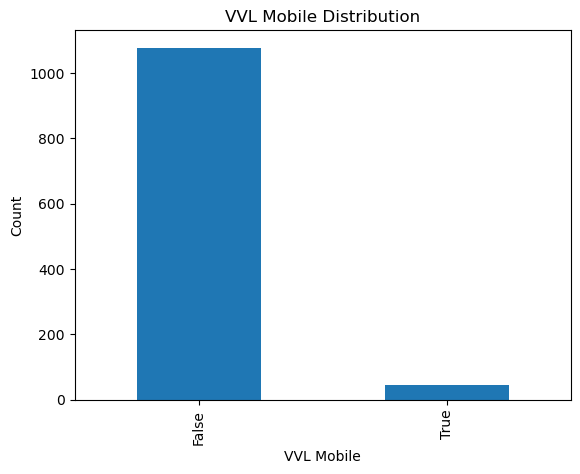

In [38]:
# Bar chart for counts
counts_1.plot(kind='bar')
plt.xlabel('VVL Mobile')
plt.ylabel('Count')
plt.title('VVL Mobile Distribution')
plt.show()

In [40]:
counts_2 = df['VVL DSL'].value_counts()
counts_2

VVL DSL
False    1115
True        6
Name: count, dtype: int64

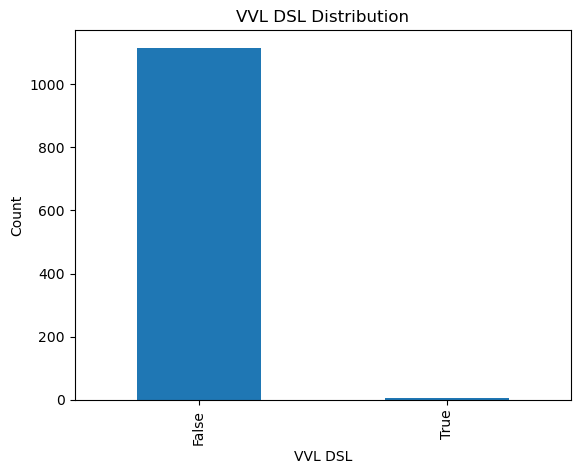

In [41]:
counts_2.plot(kind='bar')
plt.xlabel('VVL DSL')
plt.ylabel('Count')
plt.title('VVL DSL Distribution')
plt.show()

In [42]:
counts_3 = df['PO GA'].value_counts()
counts_3

PO GA
False    960
True     161
Name: count, dtype: int64

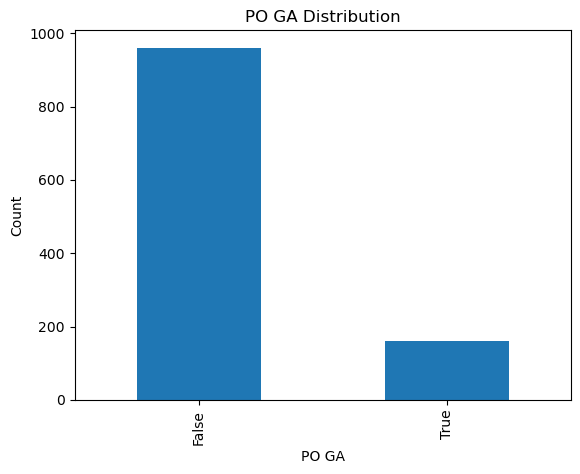

In [45]:
counts_3.plot(kind='bar')
plt.xlabel('PO GA')
plt.ylabel('Count')
plt.title('PO GA Distribution')
plt.show()

In [43]:
counts_4 = df['I@H GA'].value_counts()
counts_4

I@H GA
False    1104
True       17
Name: count, dtype: int64

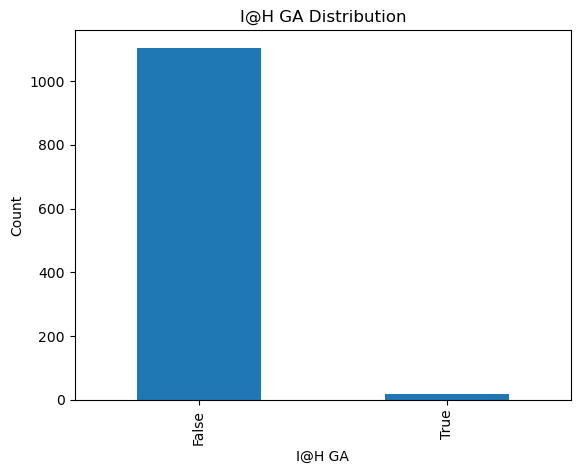

In [46]:
counts_4.plot(kind='bar')
plt.xlabel('I@H GA')
plt.ylabel('Count')
plt.title('I@H GA Distribution')
plt.show()

In [44]:
counts_5 = df['TV GA'].value_counts()
counts_5

TV GA
False    1108
True       13
Name: count, dtype: int64

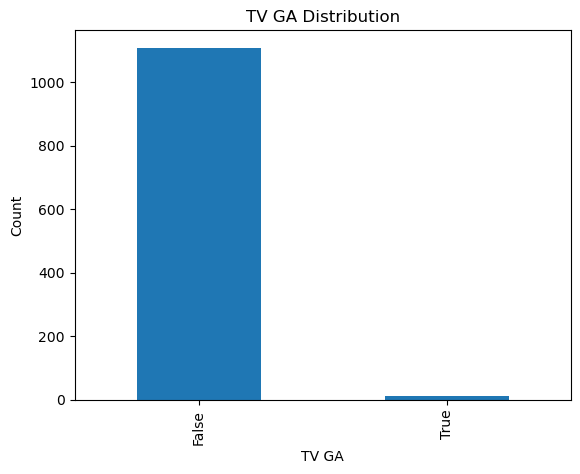

In [47]:
counts_5.plot(kind='bar')
plt.xlabel('TV GA')
plt.ylabel('Count')
plt.title('TV GA Distribution')
plt.show()

In [41]:
df.describe()

,cnt,Comment,Conditional Formatting,word_count
count,1121.00,0.00,1121.00,1121.00
mean,2523.58,NaN,0.21,178.40
std,1062.54,NaN,0.44,162.15
min,54.00,NaN,0.00,9.00
25%,2602.00,NaN,0.00,72.00
50%,2882.00,NaN,0.00,128.00
75%,3164.00,NaN,0.00,232.00
max,3444.00,NaN,2.00,1293.00


# Topic Modeling

In [50]:
# Tokenize the text and create a dictionary
def tokenize(text):
    return text.split()

texts_content = [tokenize(text) for text in df['text']]

# Create a dictionary from the tokenized text
dictionary_content = corpora.Dictionary(texts_content)

# Create document-term matrices
corpus_content = [dictionary_content.doc2bow(text) for text in texts_content]

# Perform LDA
num_topics =5
lda_model_content = gensim.models.LdaModel(corpus=corpus_content, id2word=dictionary_content, num_topics=num_topics)

# Print topics for the 'content' DataFrame
print("Topics for the text DataFrame:")
print(lda_model_content.print_topics(num_words=5))

Topics for the text DataFrame:
[(0, '0.018*"genau" + 0.015*"bekomm" + 0.013*"gut" + 0.012*"kurz" + 0.012*"dank"'), (1, '0.017*"genau" + 0.013*"vertrag" + 0.011*"gut" + 0.010*"bekomm" + 0.009*"monat"'), (2, '0.025*"genau" + 0.015*"gut" + 0.011*"kurz" + 0.010*"moment" + 0.009*"numm"'), (3, '0.021*"genau" + 0.015*"rufnumm" + 0.011*"dank" + 0.011*"moment" + 0.011*"gut"'), (4, '0.029*"genau" + 0.017*"vertrag" + 0.012*"sag" + 0.011*"kurz" + 0.010*"gut"')]


In [53]:
# Evaluation
# Compute Perplexity
print('\nText Perplexity: ', lda_model_content.log_perplexity(corpus_content))  
# a measure of how good the model is. lower the better.


Text Perplexity:  -6.991830183592322


In [54]:
# Compute Coherence Score for lda_model_content
coherence_model_content = CoherenceModel(model=lda_model_content, texts=texts_content, dictionary=dictionary_content, coherence='c_v')
coherence_content = coherence_model_content.get_coherence()
print('\nText Coherence Score: ', coherence_content)



Text Coherence Score:  0.26394572407316597


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


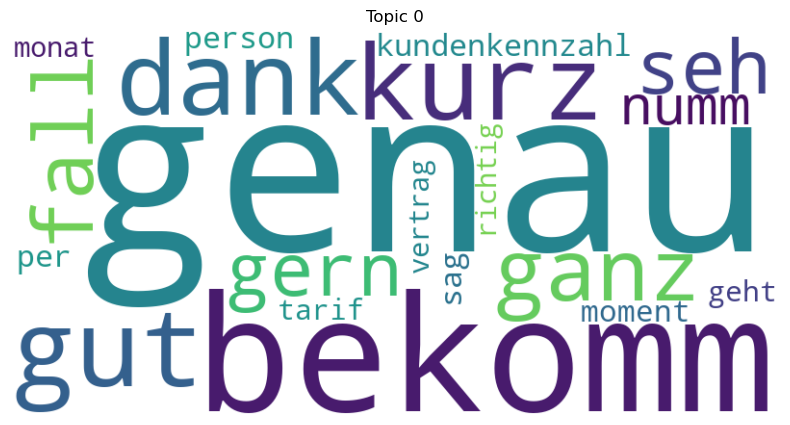

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


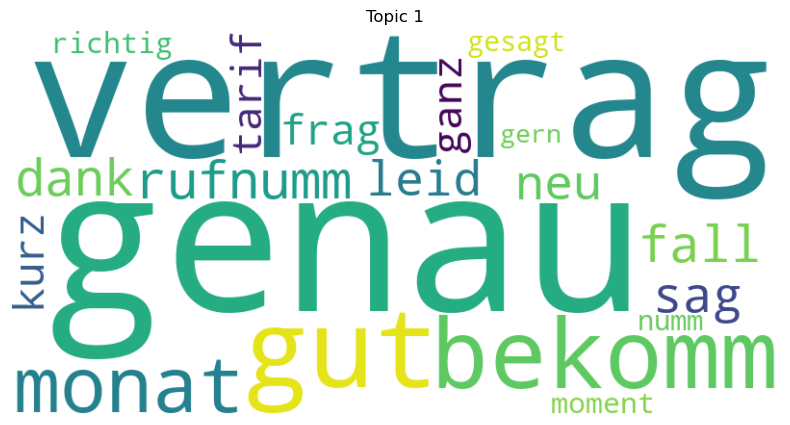

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


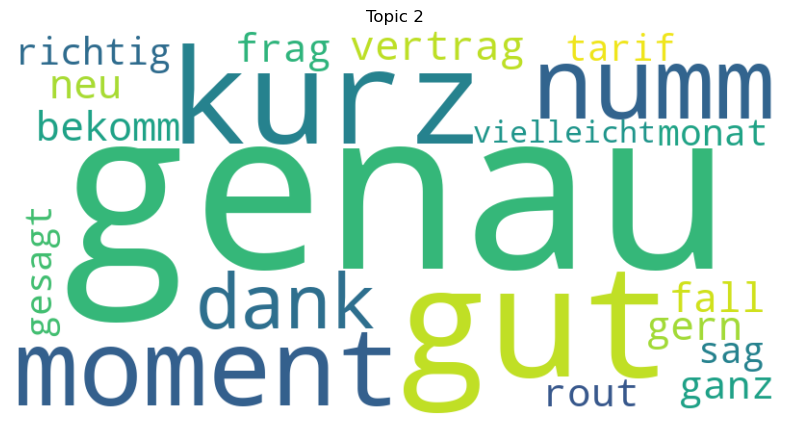

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


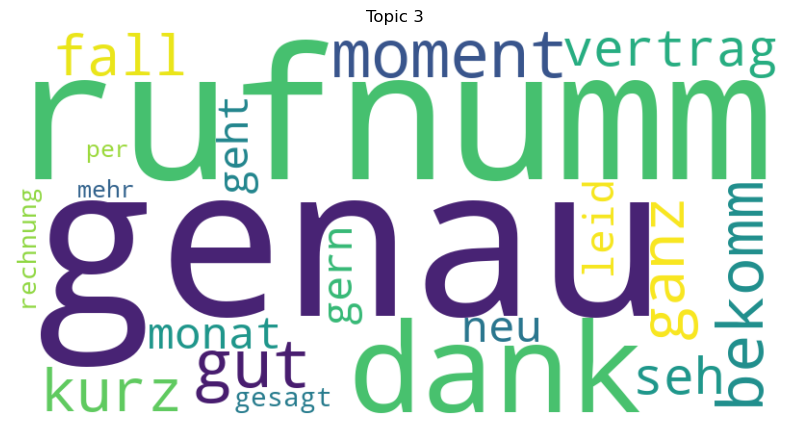

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


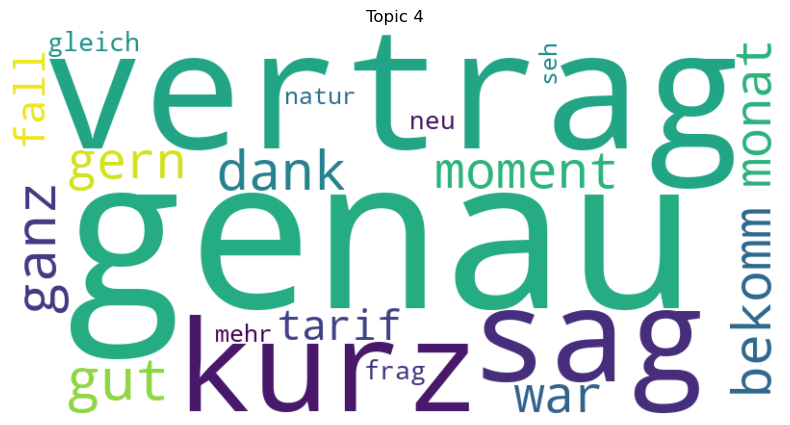

In [55]:
# Create a function to generate and display word clouds for each topic
def generate_word_clouds(lda_model, num_topics):
    for topic_num in range(num_topics):
        words = lda_model.show_topic(topic_num, topn=20)  # Get the top 20 words for each topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Topic {topic_num}")
        plt.axis("off")
        plt.show()

# Assuming you have already defined lda_model_content and num_topics
generate_word_clouds(lda_model_content, num_topics)


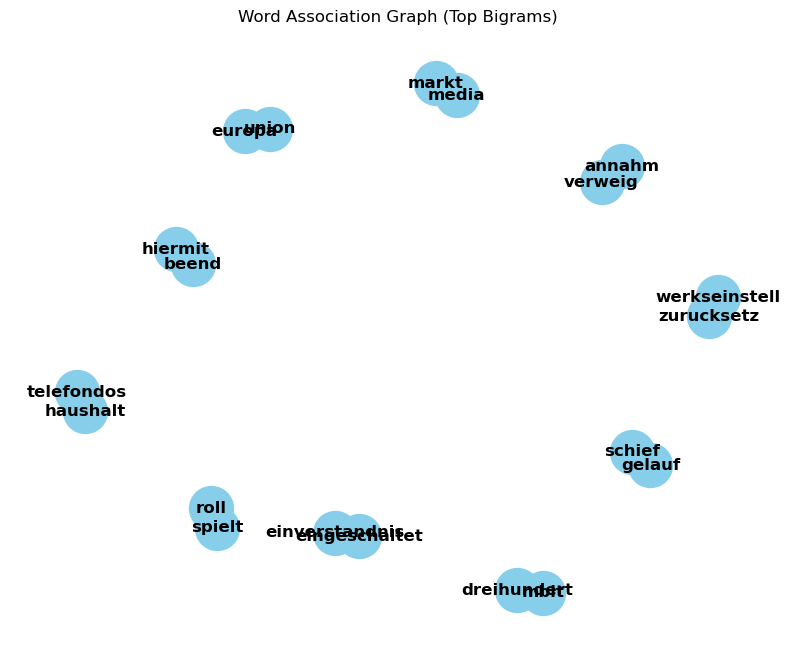

In [56]:
# Assuming you have a list of tokenized texts stored in 'texts_content'
# Join the tokens back into sentences
sentences = [' '.join(tokens) for tokens in texts_content]

# Tokenize the sentences again (if needed)
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in sentences]

# Create a BigramCollocationFinder
finder = BigramCollocationFinder.from_documents(tokenized_sentences)

# Set the association measure (you can adjust this)
bigram_measures = BigramAssocMeasures()
finder.apply_freq_filter(5)  # Adjust the frequency filter as needed

# Get the top bigrams
top_bigrams = finder.nbest(bigram_measures.pmi, 10)  # You can change the number of top bigrams

# Create a graph to represent word associations
G = nx.Graph()

# Add nodes and edges for the bigrams
for bigram in top_bigrams:
    word1, word2 = bigram
    G.add_node(word1)
    G.add_node(word2)
    G.add_edge(word1, word2)

# Create a figure and axis explicitly
plt.figure(figsize=(10, 8))
ax = plt.gca()

# Define layout for the nodes
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, font_size=12, node_size=1000, node_color='skyblue', font_color='black', font_weight='bold', ax=ax)
plt.title("Word Association Graph (Top Bigrams)")
plt.show()


# Building model for VVL Mobile

# Train-Test Split

In [59]:
features = ['text']
targets = ['VVL Mobile', 'VVL DSL', 'PO GA','I@H GA', 'TV GA']
X_train, X_test = train_test_split(df[features + targets], test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

896 225


# Create word vectorization (Bag of Words with TfidVectorizer)

In [60]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(X_train["text"])
test_vectors = vectorizer.transform(X_test["text"])
print(train_vectors.shape, test_vectors.shape)

(896, 7013) (225, 7013)


# Complement Naive Bayes

In [61]:
# Define hyperparameter grid
alpha_range = loguniform(1e-2,1e1)
parameter_grid = {'alpha':alpha_range, 'norm':[True, False]}
randomsearch_CNB = ComplementNB()
randomsearch_clf = RandomizedSearchCV(randomsearch_CNB, parameter_grid,cv=10,scoring = "roc_auc", n_iter=50)
df_res = pd.DataFrame()

In [62]:
# Train all targets independently from one another
# and store relevant results in data frame for later comparison

for target_id in range(len(targets)):
    randomsearch_clf.fit(train_vectors,X_train[targets[target_id]])
    
    class_rep = classification_report(randomsearch_clf.best_estimator_.predict(test_vectors),X_test[targets[target_id]],output_dict =True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = targets[target_id]
    print(targets[target_id])
    print(randomsearch_clf.best_estimator_.get_params())
    res["model"] = "ComplementNB"
    df_res = pd.concat((df_res,res), ignore_index=True)

VVL Mobile
{'alpha': 0.01057675403105169, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': False}
VVL DSL
{'alpha': 2.034636406481084, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': True}
PO GA
{'alpha': 0.010265760263608011, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': True}
I@H GA
{'alpha': 0.013116199311541728, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': False}
TV GA
{'alpha': 0.05572771668165129, 'class_prior': None, 'fit_prior': True, 'force_alpha': 'warn', 'norm': True}


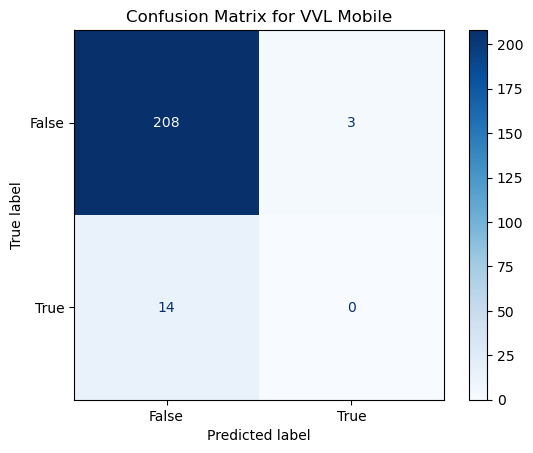

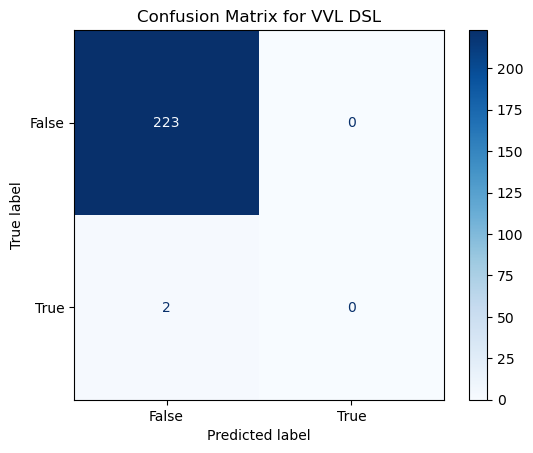

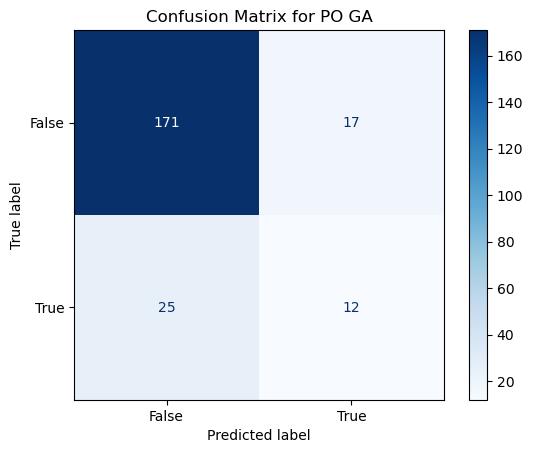

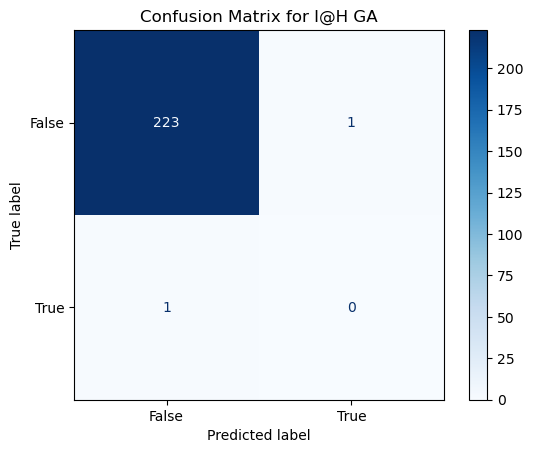

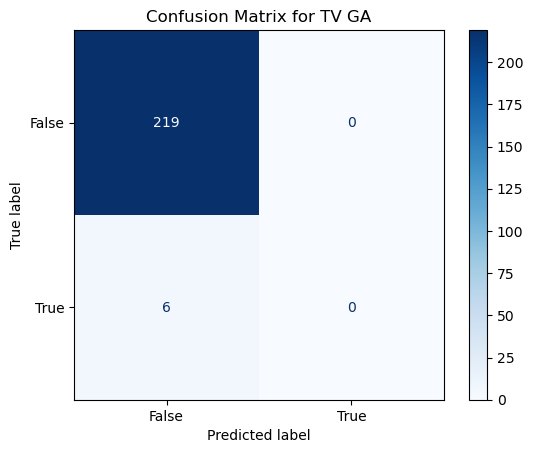

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Initialize an empty dataframe to store results
df_res = pd.DataFrame()

for target_id in range(len(targets)):
    randomsearch_clf.fit(train_vectors, X_train[targets[target_id]])

    # Get predictions on the test set
    predictions = randomsearch_clf.best_estimator_.predict(test_vectors)

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(X_test[targets[target_id]], predictions)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["False", "True"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {targets[target_id]}')
    plt.show()

    # Continue with the rest of the code for classification report and accuracy calculation
    class_rep = classification_report(predictions, X_test[targets[target_id]], output_dict=True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    # Add target and model information to the dataframe
    res["target"] = targets[target_id]
    res["model"] = "ComplementNB"

    # Concatenate the results to the main dataframe
    df_res = pd.concat((df_res, res), ignore_index=True)


# SVC

In [42]:
# Train all targets independently from one another
# and store relevant results in data frame for later comparison
c_range = loguniform(1e-1, 1e2)
degree_range = np.arange(1, 5, 1)
parameter_grid = {'C': c_range,
                  "kernel": ["linear", "poly", "rbf", "sigmoid"],
                  "degree": degree_range,
                  "gamma": ["scale", "auto"],
                  "decision_function_shape": ['ovo', 'ovr']}

randomsearch_SVC = SVC(probability=True)
randomsearch_clf_SVC = RandomizedSearchCV(randomsearch_SVC, parameter_grid, cv=10, scoring="roc_auc", n_iter=50)

for target_id in range(len(targets)):
    randomsearch_clf_SVC.fit(train_vectors, X_train[targets[target_id]])

    # Describe the problem in the FOCAL CELL
    # The error indicates that 'RandomizedSearchCV' object has no attribute 'best_estimator_'

    try:
        class_rep = classification_report(randomsearch_clf_SVC.best_estimator_.predict(test_vectors),
                                           X_test[targets[target_id]], output_dict=True)
        res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
        res.rename({"index": "metric"}, axis=1, inplace=True)
        new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
        new_row.columns = res.columns
        res = pd.concat((res, new_row), ignore_index=True)

        res["target"] = targets[target_id]
        res["model"] = "SVC"
        df_res = pd.concat((df_res, res), ignore_index=True)

    except AttributeError as e:
        # Explain why the code is not working and how to fix it
        # 'RandomizedSearchCV' object has no attribute 'best_estimator_'
        # The RandomizedSearchCV object doesn't have a 'best_estimator_' attribute directly.
        # Use 'best_params_' to get the parameters of the best estimator found during the search.

        print(f"AttributeError: {e}")
        print("To fix this issue, replace 'randomsearch_clf_SVC.best_estimator_' with 'randomsearch_clf_SVC.best_params_'")

        # If necessary, suggest a fix
        # For example, replace the problematic line with the following:
        # randomsearch_clf_SVC.best_params_['C']  # Replace 'C' with the actual parameter you want to access

        # End the loop if an error occurs
        break

In [45]:
df_res.tail(45)

,metric,subclass,value,target,model
45,precision,False,1.00,VVL Mobile,SVC
46,recall,False,0.94,VVL Mobile,SVC
47,f1-score,False,0.97,VVL Mobile,SVC
48,support,False,225.00,VVL Mobile,SVC
49,precision,True,0.00,VVL Mobile,SVC
50,recall,True,0.00,VVL Mobile,SVC
51,f1-score,True,0.00,VVL Mobile,SVC
52,support,True,0.00,VVL Mobile,SVC
53,accuracy,None,0.94,VVL Mobile,SVC
54,precision,False,1.00,VVL DSL,SVC


In [46]:
df_res.to_csv("output.csv", index=False)

# RandomForestClassifier

In [47]:
parameter_grid = {"n_estimators": np.arange(80, 200, 1),
                  "min_samples_split": np.arange(2, 10, 1),
                  "min_samples_leaf": np.arange(1, 5, 1),
                  "criterion":["gini", "entropy", "log_loss"],
                  "class_weight":["balanced", "balanced_subsample",None],
                  }

randomsearch_RFC = RandomForestClassifier()
randomsearch_clf_RFC = RandomizedSearchCV(randomsearch_RFC, parameter_grid,cv=10,scoring = "roc_auc", n_iter=100)

for target_id in range(len(targets)):
    randomsearch_clf_RFC.fit(train_vectors,X_train[targets[target_id]])
    class_rep = classification_report(randomsearch_clf_RFC.best_estimator_.predict(test_vectors),X_test[targets[target_id]],output_dict =True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = targets[target_id]
    print(targets[target_id])
    print(randomsearch_clf_RFC.best_estimator_.get_params())
    res["model"] = "RandomForest"
    df_res = pd.concat((df_res,res), ignore_index=True)

VVL Mobile
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 176, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
VVL DSL
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 151, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
PO GA
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples'

In [49]:
df_res.tail(45)


,metric,subclass,value,target,model
90,precision,False,1.00,VVL Mobile,RandomForest
91,recall,False,0.94,VVL Mobile,RandomForest
92,f1-score,False,0.97,VVL Mobile,RandomForest
93,support,False,225.00,VVL Mobile,RandomForest
94,precision,True,0.00,VVL Mobile,RandomForest
95,recall,True,0.00,VVL Mobile,RandomForest
96,f1-score,True,0.00,VVL Mobile,RandomForest
97,support,True,0.00,VVL Mobile,RandomForest
98,accuracy,None,0.94,VVL Mobile,RandomForest
99,precision,False,1.00,VVL DSL,RandomForest


In [50]:
for target_id in range(len(targets)):
    # no HP for GNB
    NBC = GaussianNB()
    NBC.fit(train_vectors.toarray(),X_train[targets[target_id]])
    class_rep = classification_report(NBC.predict(test_vectors.toarray()),X_test[targets[target_id]],output_dict =True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = targets[target_id]
    print(targets[target_id])
    print(randomsearch_clf_RFC.best_estimator_.get_params())
    res["model"] = "GaussianNaiveBayes"
    df_res = pd.concat((df_res,res), ignore_index=True)

VVL Mobile
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
VVL DSL
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
PO GA
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_lea

In [53]:
df_res.tail(45)
df_res.to_csv("output.csv", index=False)

In [60]:
parameter_grid = {"n_estimators": np.arange(30, 100, 1),
                  "learning_rate": loguniform(1e-1, 1e1)
                  }

randomsearch_ABC = AdaBoostClassifier()
randomsearch_clf_ABC = RandomizedSearchCV(randomsearch_ABC, parameter_grid,cv=10,scoring = "roc_auc", n_iter=20)

for target_id in range(len(targets)):
    randomsearch_clf_ABC.fit(train_vectors,X_train[targets[target_id]])
    class_rep = classification_report(randomsearch_clf_ABC.best_estimator_.predict(test_vectors),X_test[targets[target_id]],output_dict =True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = targets[target_id]
    print(targets[target_id])
    print(randomsearch_clf_RFC.best_estimator_.get_params())
    res["model"] = "AdaBoost"
    df_res = pd.concat((df_res,res), ignore_index=True)

VVL Mobile
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
VVL DSL
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
PO GA
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_lea

In [62]:
df_res.tail(45)


,metric,subclass,value,target,model
270,precision,False,0.99,VVL Mobile,AdaBoost
271,recall,False,0.94,VVL Mobile,AdaBoost
272,f1-score,False,0.96,VVL Mobile,AdaBoost
273,support,False,223.00,VVL Mobile,AdaBoost
274,precision,True,0.00,VVL Mobile,AdaBoost
275,recall,True,0.00,VVL Mobile,AdaBoost
276,f1-score,True,0.00,VVL Mobile,AdaBoost
277,support,True,2.00,VVL Mobile,AdaBoost
278,accuracy,None,0.93,VVL Mobile,AdaBoost
279,precision,False,1.00,VVL DSL,AdaBoost


In [54]:
parameter_grid = {"kernel": [1.0 * RBF(length_scale=1.15), 1.0 * DotProduct(sigma_0=1.0) ** 2]}

# gridsearch since we're comparing exactly two settings
gridsearch_GPC = GaussianProcessClassifier()
gridsearch_clf_GPC = GridSearchCV(gridsearch_GPC, parameter_grid,cv=2,scoring = "roc_auc")

for target_id in range(len(targets)):
    gridsearch_clf_GPC.fit(train_vectors.toarray(),np.array(X_train[targets[target_id]]))
    class_rep = classification_report(gridsearch_clf_GPC.best_estimator_.predict(test_vectors.toarray()),np.array(X_test[targets[target_id]]),output_dict =True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = targets[target_id]
    print(targets[target_id])
    print(randomsearch_clf_RFC.best_estimator_.get_params())
    res["model"] = "GaussianProcess"
    df_res = pd.concat((df_res,res), ignore_index=True)

VVL Mobile
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
VVL DSL
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 130, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
PO GA
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_lea

In [56]:
df_res.tail(45)

In [57]:
parameter_grid = {
    "n_neighbors": [3, 5, 7, 9, 11],
    "weights": ["uniform", "distance"],
    "p": [1, 2],
}

randomsearch_KNN = KNeighborsClassifier()
randomsearch_clf_KNN = RandomizedSearchCV(
    randomsearch_KNN, parameter_grid, cv=10, scoring="roc_auc", n_iter=100
)

for target_id in range(len(targets)):
    randomsearch_clf_KNN.fit(train_vectors, X_train[targets[target_id]])
    class_rep = classification_report(
        randomsearch_clf_KNN.best_estimator_.predict(test_vectors),
        X_test[targets[target_id]],
        output_dict=True,
    )
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(
        id_vars=("index"), var_name="subclass"
    )
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = targets[target_id]
    print(targets[target_id])
    print(randomsearch_clf_KNN.best_estimator_.get_params())
    res["model"] = "KNeighborsClassifier"
    df_res = pd.concat((df_res, res), ignore_index=True)


VVL Mobile
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
VVL DSL
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
PO GA
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
I@H GA
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
TV GA
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


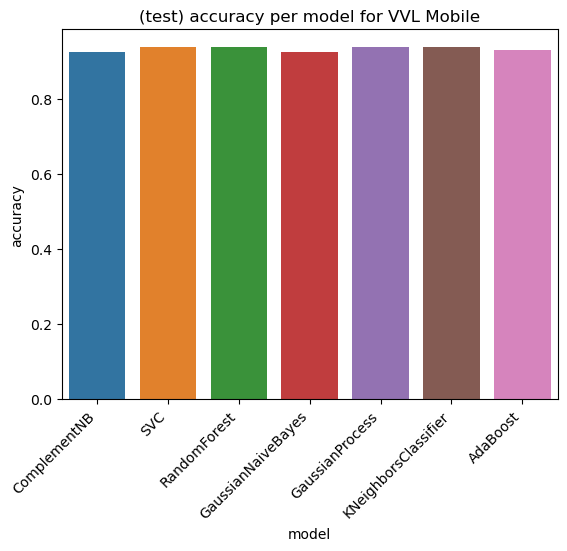

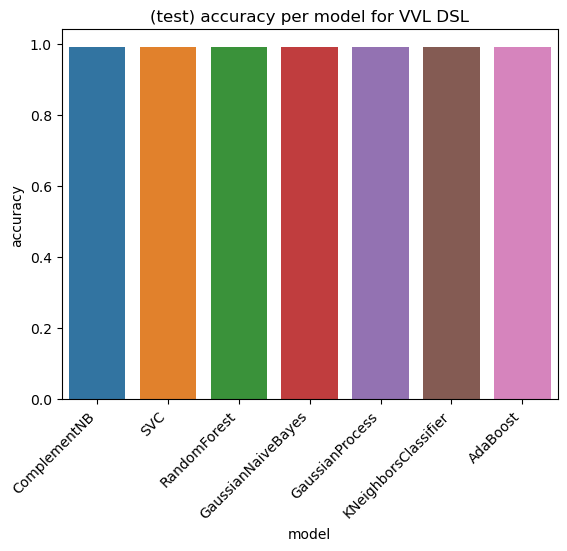

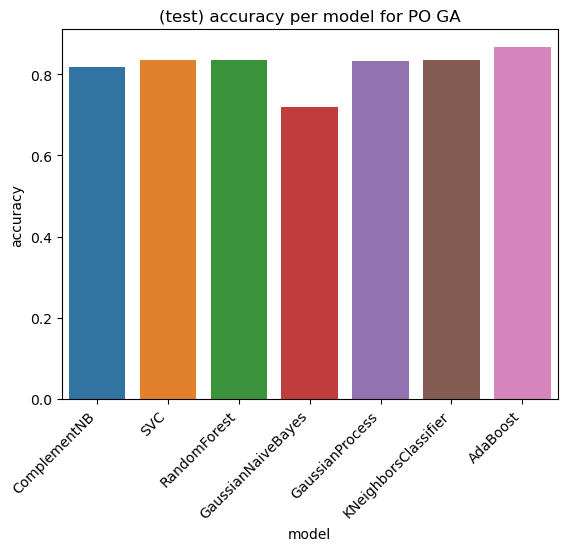

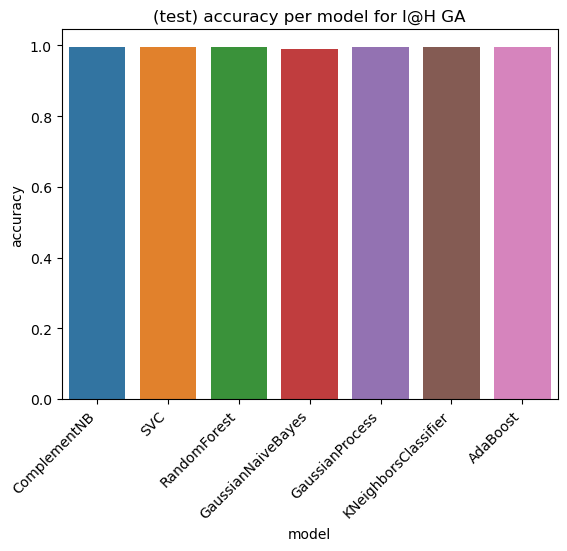

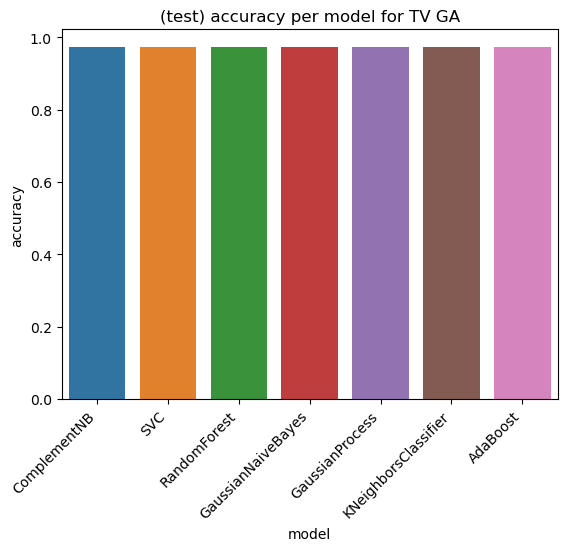

In [73]:
for variable in targets:
    # Filter the data based on conditions
    filtered_data = df_res.loc[(df_res["metric"] == "accuracy") & (df_res["target"] == variable)]

    # Check if there is data after filtering
    if not filtered_data.empty:
        # Create the bar plot
        ax = sns.barplot(data=filtered_data, x="model", y="value")

        # Set plot title and labels
        plt.title(f"(test) accuracy per model for {variable}")
        plt.ylabel("accuracy")

        # Rotate x-axis labels for better visibility
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

        # Show the plot
        plt.show()
    else:
        print(f"No data for {variable}")


C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


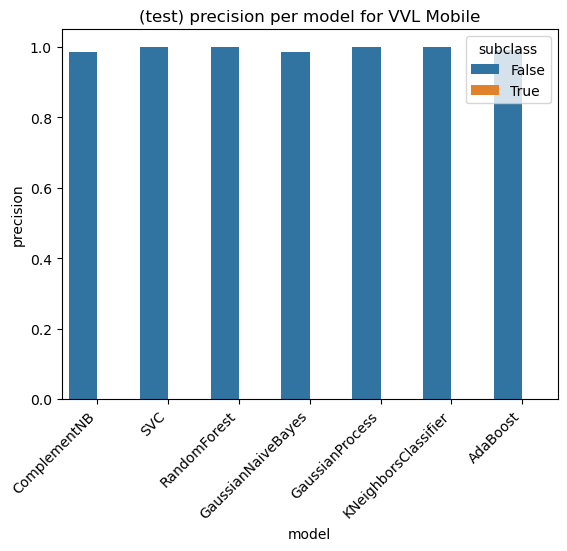

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


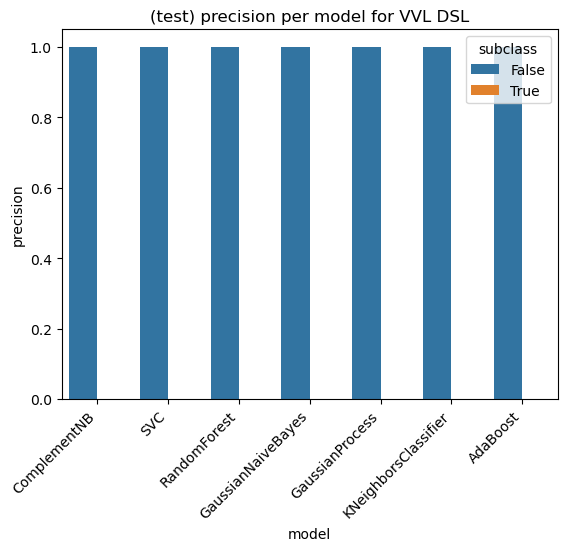

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


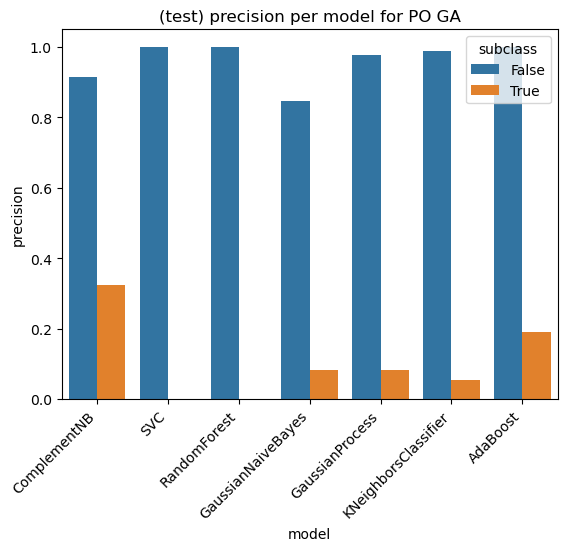

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


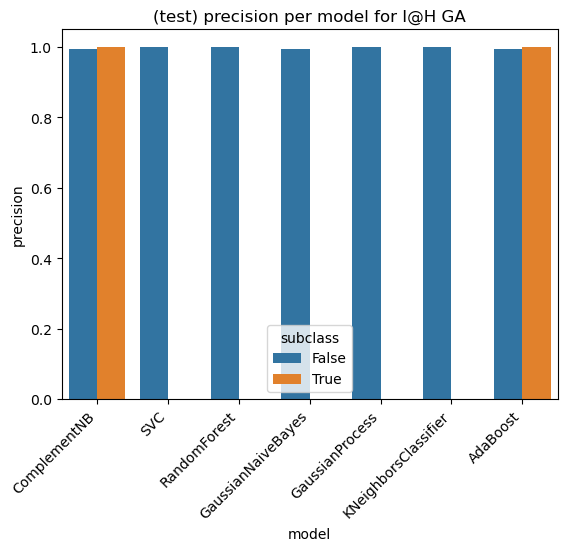

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


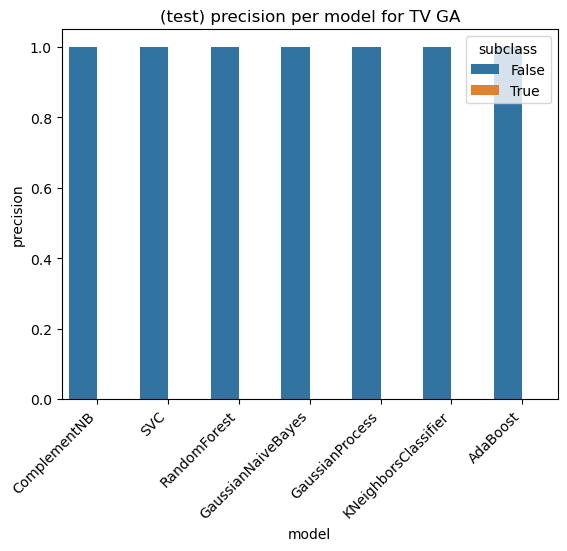

In [76]:
for variable in targets:
    # Filter the data based on conditions
    filtered_data = df_res.loc[(df_res["metric"] == "precision") & (df_res["target"] == variable)]

    # Check if there is data after filtering
    if not filtered_data.empty:
        # Create the bar plot
        ax = sns.barplot(data=filtered_data, x="model", y="value", hue="subclass")

        # Set plot title and labels
        plt.title(f"(test) precision per model for {variable}")
        plt.ylabel("precision")

        # Rotate x-axis labels for better visibility
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

        # Show the plot
        plt.show()
    else:
        print(f"No data for {variable}")    

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


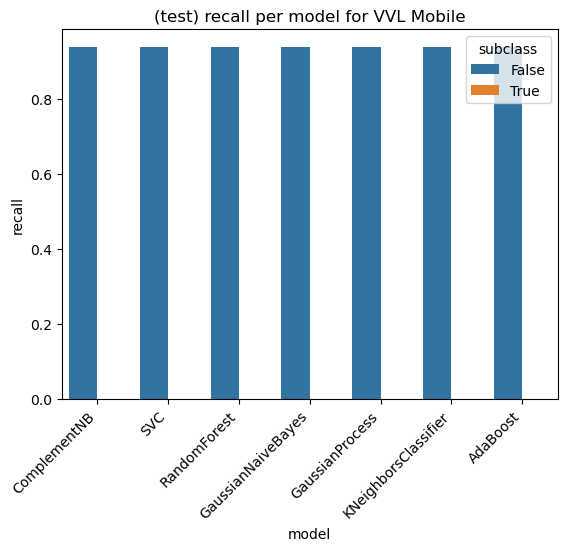

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


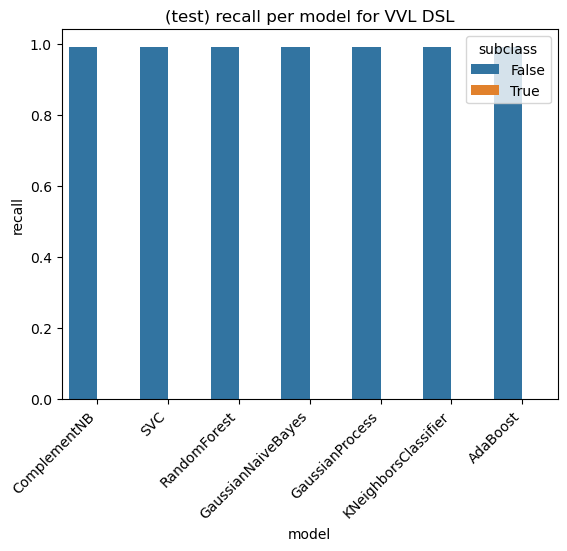

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


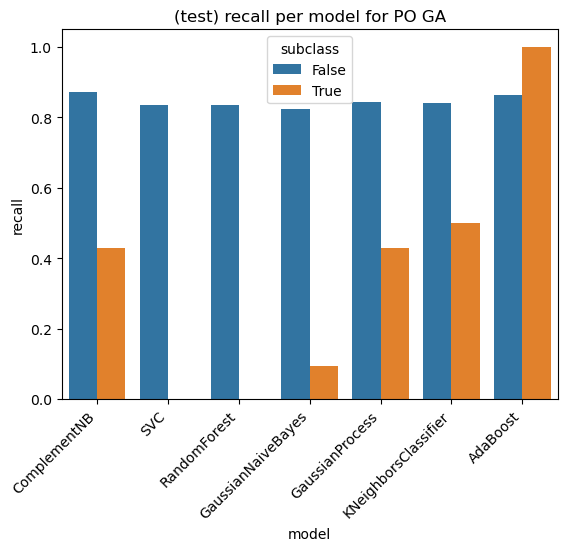

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


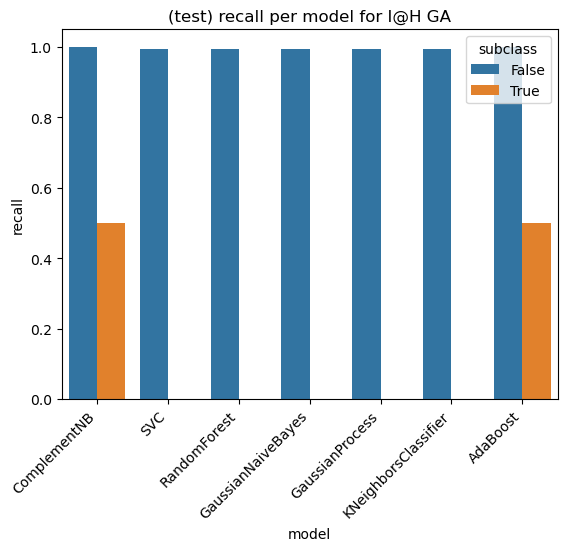

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


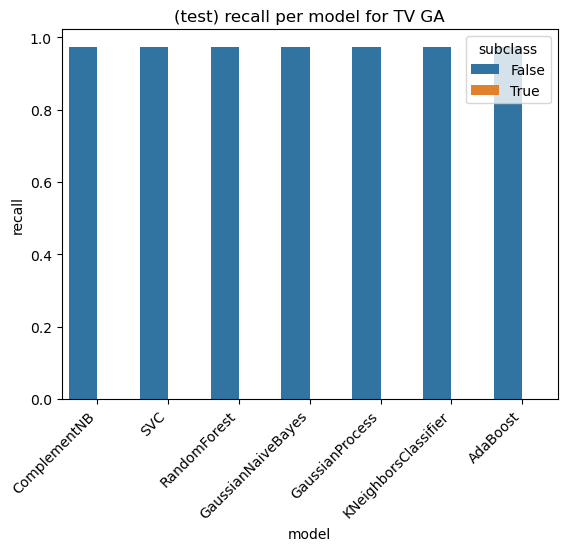

In [77]:
for variable in targets:
    # Filter the data based on conditions
    filtered_data = df_res.loc[(df_res["metric"] == "recall") & (df_res["target"] == variable)]

    # Check if there is data after filtering
    if not filtered_data.empty:
        # Create the bar plot
        ax = sns.barplot(data=filtered_data, x="model", y="value", hue="subclass")

        # Set plot title and labels
        plt.title(f"(test) recall per model for {variable}")
        plt.ylabel("recall")

        # Rotate x-axis labels for better visibility
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

        # Show the plot
        plt.show()
    else:
        print(f"No data for {variable}")    

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


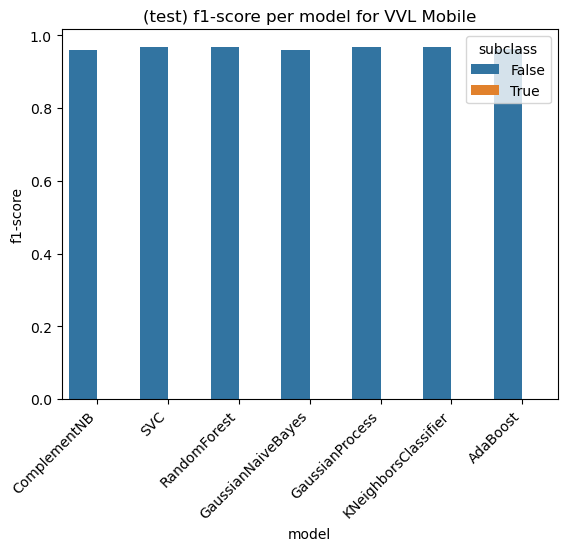

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


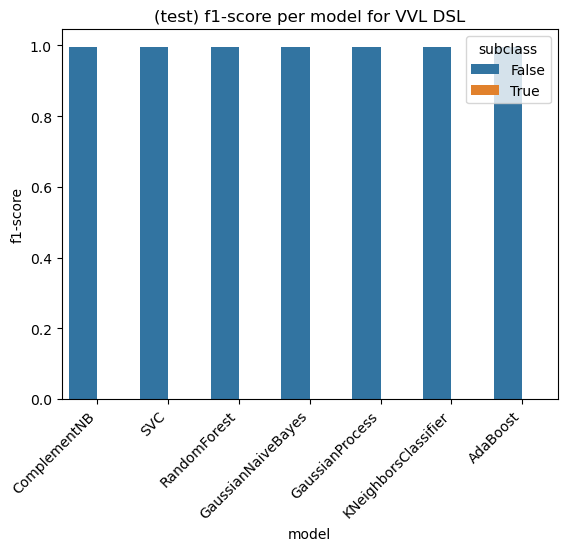

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


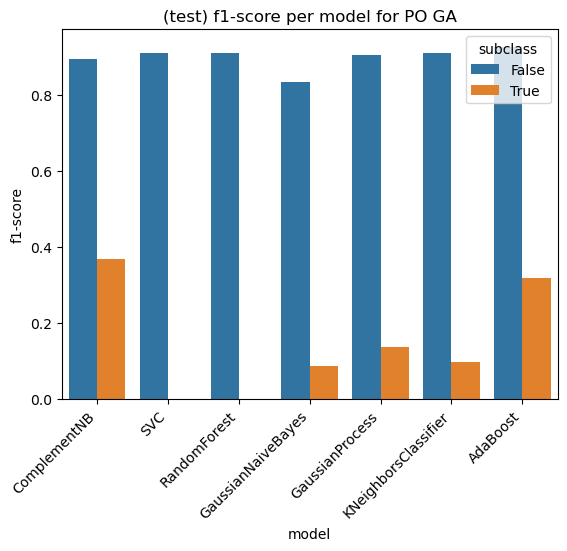

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


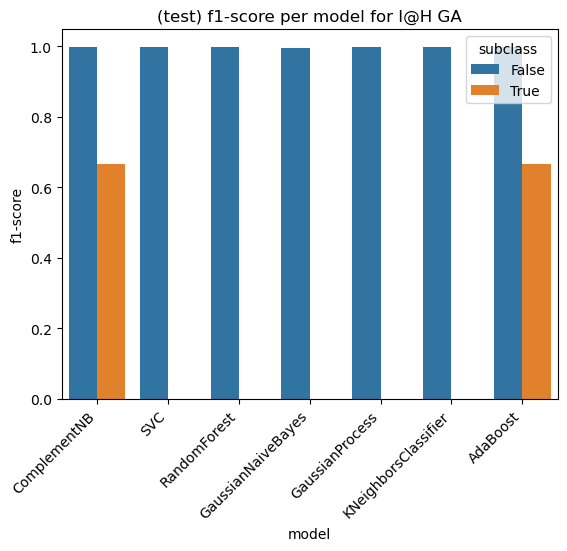

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


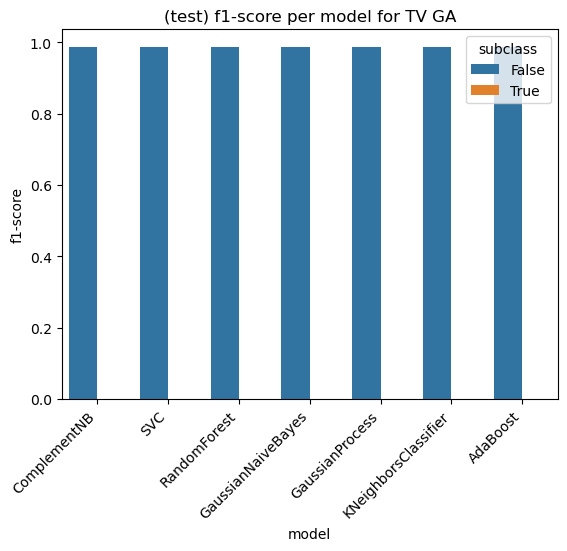

In [78]:
for variable in targets:
    # Filter the data based on conditions
    filtered_data = df_res.loc[(df_res["metric"] == "f1-score") & (df_res["target"] == variable)]

    # Check if there is data after filtering
    if not filtered_data.empty:
        # Create the bar plot
        ax = sns.barplot(data=filtered_data, x="model", y="value", hue="subclass")

        # Set plot title and labels
        plt.title(f"(test) f1-score per model for {variable}")
        plt.ylabel("f1-score")

        # Rotate x-axis labels for better visibility
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

        # Show the plot
        plt.show()
    else:
        print(f"No data for {variable}")   

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


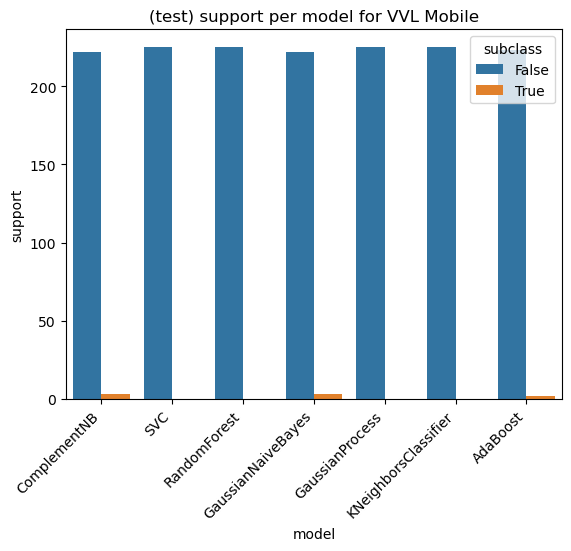

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


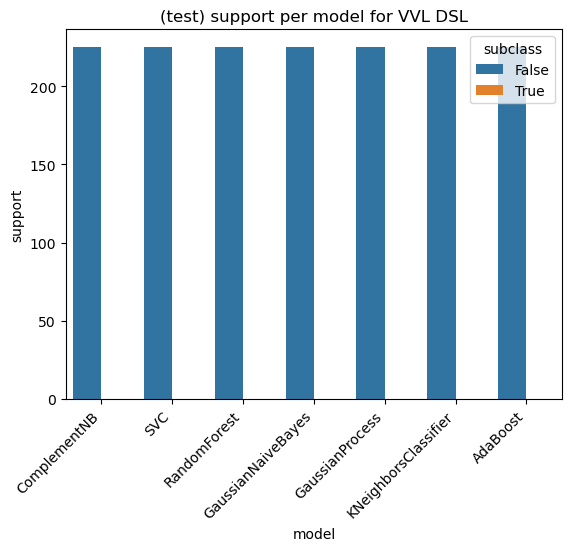

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


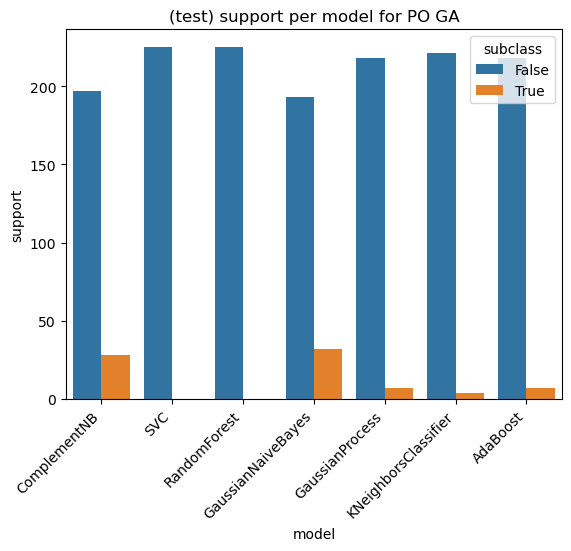

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


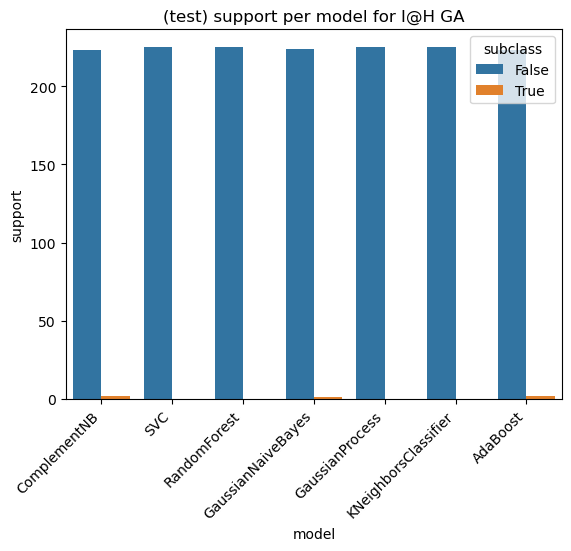

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


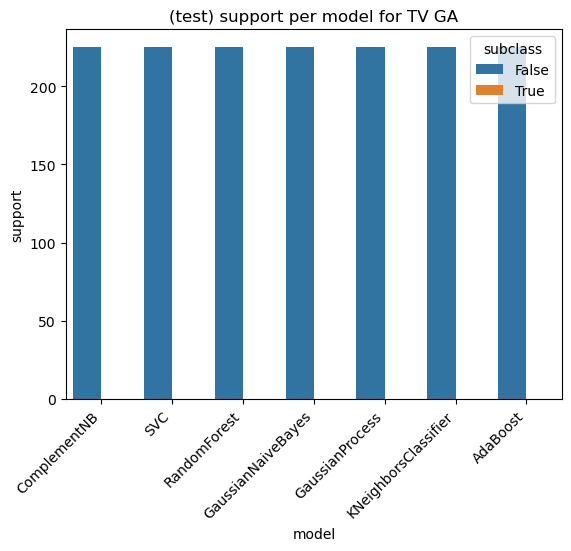

In [79]:
for variable in targets:
    # Filter the data based on conditions
    filtered_data = df_res.loc[(df_res["metric"] == "support") & (df_res["target"] == variable)]

    # Check if there is data after filtering
    if not filtered_data.empty:
        # Create the bar plot
        ax = sns.barplot(data=filtered_data, x="model", y="value", hue="subclass")

        # Set plot title and labels
        plt.title(f"(test) support per model for {variable}")
        plt.ylabel("support")

        # Rotate x-axis labels for better visibility
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

        # Show the plot
        plt.show()
    else:
        print(f"No data for {variable}")   

C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\seaborn\categorical.py:381: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) < "3.0":
C:\Users\Muhammad Farhan\anaconda\Lib\site-packages\setuptools\_distutils\version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


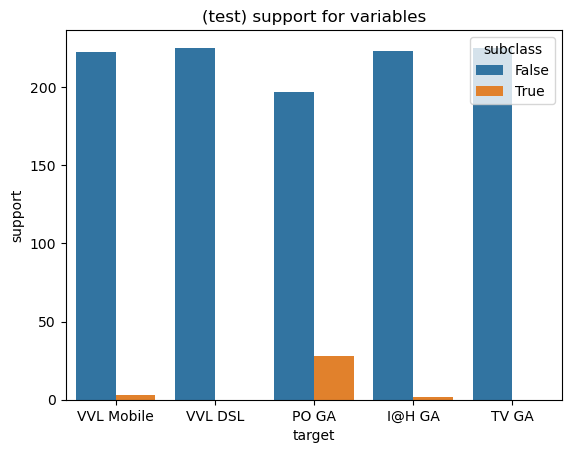

In [83]:
filtered_data = df_res.loc[(df_res["metric"]=="support") & (df_res["model"]=="ComplementNB")]
ax = sns.barplot(data=filtered_data, x="target", y="value", hue="subclass")
plt.title(f"(test) support for variables")
plt.ylabel("support")
plt.show()

In [92]:
df_res.to_excel("model output.xlsx", index=False)

# Classification LLM (using BERT)


In [16]:
target_names = ['VVL Mobile', 'VVL DSL', 'PO GA','I@H GA', 'TV GA']

In [18]:
# Tokenize the input text
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

class CustomDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len, target_column):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe['text']
        self.targets = self.data[target_column]
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        target = self.targets[index]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt',
            truncation=True
        )

        return {
            'text': text,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'target': torch.tensor(target, dtype=torch.long)
        }

# Define hyperparameters
MAX_LEN = 128
BATCH_SIZE = 16

In [24]:
df_res_BERT = pd.DataFrame()

for target_column in target_names:
    # Create DataLoader
    train_dataset = CustomDataset(X_train.reset_index()[["index", "text", target_column]], tokenizer, MAX_LEN, target_column=target_column)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    test_dataset = CustomDataset(X_test.reset_index()[["index", "text", target_column]], tokenizer, MAX_LEN, target_column=target_column)
    test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
    
    # Load pre-trained BERT model for sequence classification
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=1)

    # Define optimizer and loss function
    optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
    criterion = torch.nn.CrossEntropyLoss()

    # Training loop
    EPOCHS = 3

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for epoch in range(EPOCHS):
        model.train()
        total_loss = 0

        for batch in tqdm(train_loader, total=len(train_loader), desc=f'Epoch {epoch + 1}/{EPOCHS}'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(torch.float32).to(device)
            targets = batch['target'].to(torch.float32).to(device)  # Add this line

            optimizer.zero_grad()

            outputs = model(input_ids, attention_mask=attention_mask, labels=targets)
            loss = outputs.loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        average_loss = total_loss / len(train_loader)
        print(f'Epoch {epoch + 1}/{EPOCHS}, Loss: {average_loss:.4f}')


    # Evaluation
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for batch in tqdm(test_loader, total=len(test_loader), desc='Evaluating'):
            input_ids = batch['input_ids'].to(torch.float32).to(device)
            attention_mask = batch['attention_mask'].to(torch.float32).to(device)
            targets = batch['target'].to(torch.float32).to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            predictions = torch.argmax(logits, dim=1)

            all_predictions.extend(predictions.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    # Calculate accuracy
    accuracy = accuracy_score(all_targets, all_predictions)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    class_rep = classification_report(all_targets, all_predictions, output_dict =True)
    res = pd.DataFrame(class_rep)[["False", "True"]].reset_index().melt(id_vars=("index"), var_name="subclass")
    res.rename({"index": "metric"}, axis=1, inplace=True)
    new_row = pd.DataFrame(["accuracy", None, class_rep["accuracy"]]).T
    new_row.columns = res.columns
    res = pd.concat((res, new_row), ignore_index=True)

    res["target"] = target_column
    res["model"] = "BERT"
    df_res_BERT = pd.concat((df_res_BERT,res), ignore_index=True)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1/3:   4%|▎         | 2/56 [05:23<2:25:16, 161.42s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 1/3:   9%|▉         | 5/56 [13:22<2:16:00, 160.02s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 1/3:  14%|█▍        | 8/56 [21:22<2:08:02, 160.05s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 1/3:  20%|█▉        | 11/56 [29:23<2:00:09, 160.22s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  25%|██▌       | 14/56 [37:24<1:52:06, 160.15s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  30%|███       | 17/56 [45:26<1:44:17, 160.46s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  36%|███▌      | 20/56 [53:29<1:36:32, 160.90s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  41%|████      | 23/56 [1:01:35<1:29:01, 161.86s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 1/3:  46%|████▋     | 26/56 [1:09:37<1:20:27, 160.92s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 1/3:  52%|█████▏    | 29/56 [1:17:37<1:12:06, 160.25s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 1/3:  57%|█████▋    | 32/56 [1:25:37<1:04:05, 160.21s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 1/3:  62%|██████▎   | 35/56 [1:33:46<56:55, 162.62s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  68%|██████▊   | 38/56 [1:41:53<48:48, 162.68s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  73%|███████▎  | 41/56 [1:50:05<40:49, 163.31s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  79%|███████▊  | 44/56 [1:58:29<33:23, 166.97s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  84%|████████▍ | 47/56 [2:07:06<25:35, 170.65s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  89%|████████▉ | 50/56 [2:15:19<16:38, 166.42s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3:  95%|█████████▍| 53/56 [2:23:38<08:18, 166.11s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 1/3: 100%|██████████| 56/56 [2:31:56<00:00, 162.80s/it]


Epoch 1/3, Loss: 0.0444


Epoch 2/3:   0%|          | 0/56 [00:00<?, ?it/s]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farha

Epoch 2/3:   5%|▌         | 3/56 [07:58<2:21:04, 159.71s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 2/3:  11%|█         | 6/56 [15:58<2:13:11, 159.84s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 2/3:  16%|█▌        | 9/56 [24:00<2:05:32, 160.27s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 2/3:  21%|██▏       | 12/56 [32:07<1:58:28, 161.55s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  27%|██▋       | 15/56 [40:06<1:49:40, 160.51s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  32%|███▏      | 18/56 [48:07<1:41:37, 160.47s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  38%|███▊      | 21/56 [56:17<1:34:51, 162.63s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  43%|████▎     | 24/56 [1:04:37<1:28:04, 165.14s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 2/3:  48%|████▊     | 27/56 [1:12:59<1:20:26, 166.42s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 2/3:  54%|█████▎    | 30/56 [1:21:12<1:11:25, 164.83s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 2/3:  59%|█████▉    | 33/56 [1:29:28<1:03:37, 165.96s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 2/3:  64%|██████▍   | 36/56 [1:37:41<55:02, 165.14s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  70%|██████▉   | 39/56 [1:45:56<46:41, 164.77s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  75%|███████▌  | 42/56 [1:54:04<38:03, 163.12s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  80%|████████  | 45/56 [2:02:15<29:55, 163.27s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  86%|████████▌ | 48/56 [2:10:30<21:52, 164.08s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  91%|█████████ | 51/56 [2:18:43<13:40, 164.15s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3:  96%|█████████▋| 54/56 [2:26:47<05:24, 162.39s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 2/3, Loss: 0.0373


Epoch 3/3:   0%|          | 0/56 [00:00<?, ?it/s]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farha

Epoch 3/3:   5%|▌         | 3/56 [08:08<2:22:37, 161.46s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 3/3:  11%|█         | 6/56 [16:06<2:13:20, 160.02s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 3/3:  16%|█▌        | 9/56 [24:04<2:05:01, 159.61s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muh

Epoch 3/3:  21%|██▏       | 12/56 [32:05<1:57:31, 160.26s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  27%|██▋       | 15/56 [40:08<1:49:49, 160.71s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  32%|███▏      | 18/56 [48:11<1:41:47, 160.72s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  38%|███▊      | 21/56 [56:09<1:33:19, 159.99s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  43%|████▎     | 24/56 [1:04:10<1:25:27, 160.23s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 3/3:  48%|████▊     | 27/56 [1:12:12<1:17:38, 160.62s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 3/3:  54%|█████▎    | 30/56 [1:20:12<1:09:21, 160.04s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 3/3:  59%|█████▉    | 33/56 [1:28:12<1:01:18, 159.93s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\

Epoch 3/3:  64%|██████▍   | 36/56 [1:36:07<53:00, 159.00s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  70%|██████▉   | 39/56 [1:44:12<45:30, 160.64s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  75%|███████▌  | 42/56 [1:52:15<37:30, 160.73s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  80%|████████  | 45/56 [2:00:29<30:04, 164.00s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  86%|████████▌ | 48/56 [2:08:56<22:13, 166.74s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  91%|█████████ | 51/56 [2:17:15<13:51, 166.26s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3:  96%|█████████▋| 54/56 [2:25:36<05:32, 166.01s/it]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Mu

Epoch 3/3, Loss: 0.0367


Evaluating:   0%|          | 0/15 [00:00<?, ?it/s]C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farhan\AppData\Local\Temp\ipykernel_7000\2291878664.py:34: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  'target': torch.tensor(target, dtype=torch.long)
C:\Users\Muhammad Farh

RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)